In [1]:
# in your notebook cell
import sys

# path relative to your notebook
sys.path.insert(0, '../src')

import pandas as pd
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import function as f
import matplotlib.colors as mcolors


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
birth_rates_df = f.create_df_from_csv('../data/us_births_2016_2021.csv')
new_df = f.create_df_from_csv('../data/Natality, 2007-2021.txt')

In [4]:
new_df1 = new_df.drop(columns=['Notes', 'Year Code', 'State Code'])
new_df1

,State,Year,Marital Status,Marital Status Code,Tobacco Use,Tobacco Use Code,Diabetes,Diabetes Code,Births,% of Total Births,Average Birth Weight,Average Age of Mother
0,Alabama,2007,Married,1,Not Reported,10,Yes,1,2016,0.00%,3333.52,30.25
1,Alabama,2007,Married,1,Not Reported,10,No,2,37845,0.06%,3244.50,27.61
2,Alabama,2007,Married,1,Not Reported,10,Unknown or Not Stated,9,103,0.00%,3325.40,26.62
3,Alabama,2007,Unmarried,2,Not Reported,10,Yes,1,786,0.00%,3183.51,26.50
4,Alabama,2007,Unmarried,2,Not Reported,10,No,2,24016,0.04%,3055.34,22.92
...,...,...,...,...,...,...,...,...,...,...,...,...
8170,Wyoming,2021,Unmarried,2,Yes,1,No,2,348,0.00%,3007.87,26.24
8171,Wyoming,2021,Unmarried,2,No,2,Yes,1,99,0.00%,3155.60,28.46
8172,Wyoming,2021,Unmarried,2,No,2,No,2,1416,0.00%,3129.75,25.08
8173,Wyoming,2021,Unmarried,2,Unknown or Not Stated,9,Yes,1,11,0.00%,3167.00,29.91


In [5]:
birth_rates_df.head(10)

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3
5,Alabama,AL,2016,F,"Bachelor's degree (BA, AB, BS)",6,4453,30.3,3239.0
6,Alabama,AL,2016,F,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,1910,32.0,3263.5
7,Alabama,AL,2016,F,"Doctorate (PhD, EdD) or Professional Degree (M...",8,487,33.1,3196.7
8,Alabama,AL,2016,F,Unknown or Not Stated,-9,65,27.7,3083.9
9,Alabama,AL,2016,M,8th grade or less,1,1188,27.6,3232.9


In [6]:
birth_rates_df.shape

(5496, 9)

In [7]:
birth_rates_df.describe()

,Year,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
count,5496.000000,5496.000000,5496.000000,5496.000000,5496.000000
mean,2018.500728,3.026201,4115.443959,29.552274,3250.887627
std,1.707554,4.733406,6687.036797,2.779735,114.456090
min,2016.000000,-9.000000,10.000000,23.100000,2451.900000
25%,2017.000000,2.000000,559.000000,27.500000,3182.200000
50%,2019.000000,4.000000,1692.000000,29.600000,3256.000000
75%,2020.000000,6.000000,5140.000000,31.800000,3330.825000
max,2021.000000,8.000000,59967.000000,35.500000,3585.700000


In [8]:
birth_rates_df.dtypes

State                             object
State Abbreviation                object
Year                               int64
Gender                            object
Education Level of Mother         object
Education Level Code               int64
Number of Births                   int64
Average Age of Mother (years)    float64
Average Birth Weight (g)         float64
dtype: object

In [9]:
z = birth_rates_df.drop(columns=["Gender", 'Education Level of Mother', 'State']).set_index('State Abbreviation').corr()
z2 = birth_rates_df.drop(columns=["Gender", 'Education Level of Mother', 'State', "State Abbreviation"]).groupby('Year').sum()
z4 = birth_rates_df.drop(columns=["Gender", 'State', 'Average Birth Weight (g)', 'State Abbreviation']).reset_index()
z4_cleaned = z4.groupby(['Year', 'Education Level of Mother', 'Education Level Code']).agg({"Number of Births":'sum', 'Average Age of Mother (years)':'mean'}).reset_index()


In [10]:
z3 = birth_rates_df.drop(columns=["Gender", 'Education Level of Mother', 'State', "State Abbreviation"])
z3

,Year,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,2016,1,1052,27.8,3116.9
1,2016,2,3436,24.1,3040.0
2,2016,3,8777,25.4,3080.0
3,2016,4,6453,26.7,3121.9
4,2016,5,2227,28.9,3174.3
...,...,...,...,...,...
5491,2021,5,401,29.2,3261.1
5492,2021,6,657,30.7,3286.0
5493,2021,7,261,33.0,3249.3
5494,2021,8,72,33.3,3262.0


In [11]:
z4

,index,Year,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years)
0,0,2016,8th grade or less,1,1052,27.8
1,1,2016,9th through 12th grade with no diploma,2,3436,24.1
2,2,2016,High school graduate or GED completed,3,8777,25.4
3,3,2016,"Some college credit, but not a degree",4,6453,26.7
4,4,2016,"Associate degree (AA, AS)",5,2227,28.9
...,...,...,...,...,...,...
5491,5491,2021,"Associate degree (AA, AS)",5,401,29.2
5492,5492,2021,"Bachelor's degree (BA, AB, BS)",6,657,30.7
5493,5493,2021,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,261,33.0
5494,5494,2021,"Doctorate (PhD, EdD) or Professional Degree (M...",8,72,33.3


In [12]:
z4_df = pd.DataFrame(z4)


<Axes: >

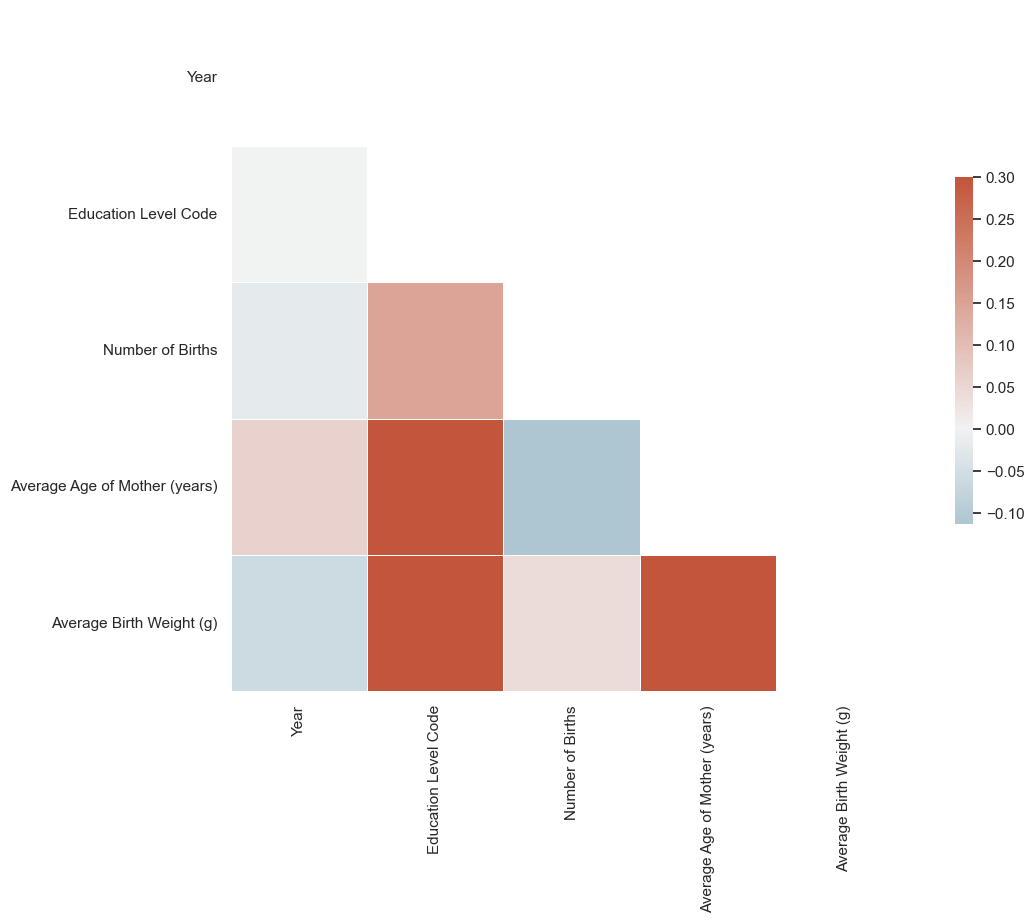

In [13]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset


# Compute the correlation matrix
corr = z

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: xlabel='Year'>

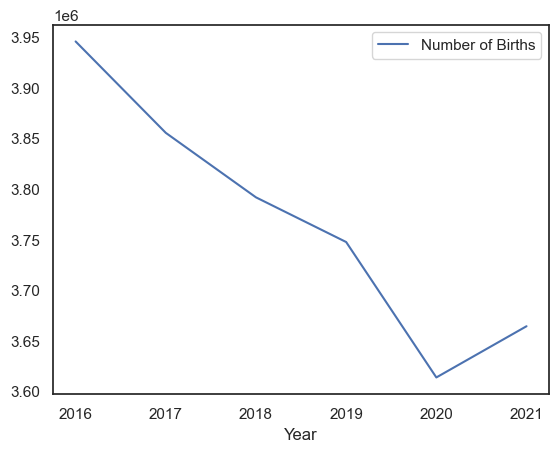

In [14]:
z2.plot(kind = 'line',y= 'Number of Births')

<Axes: >

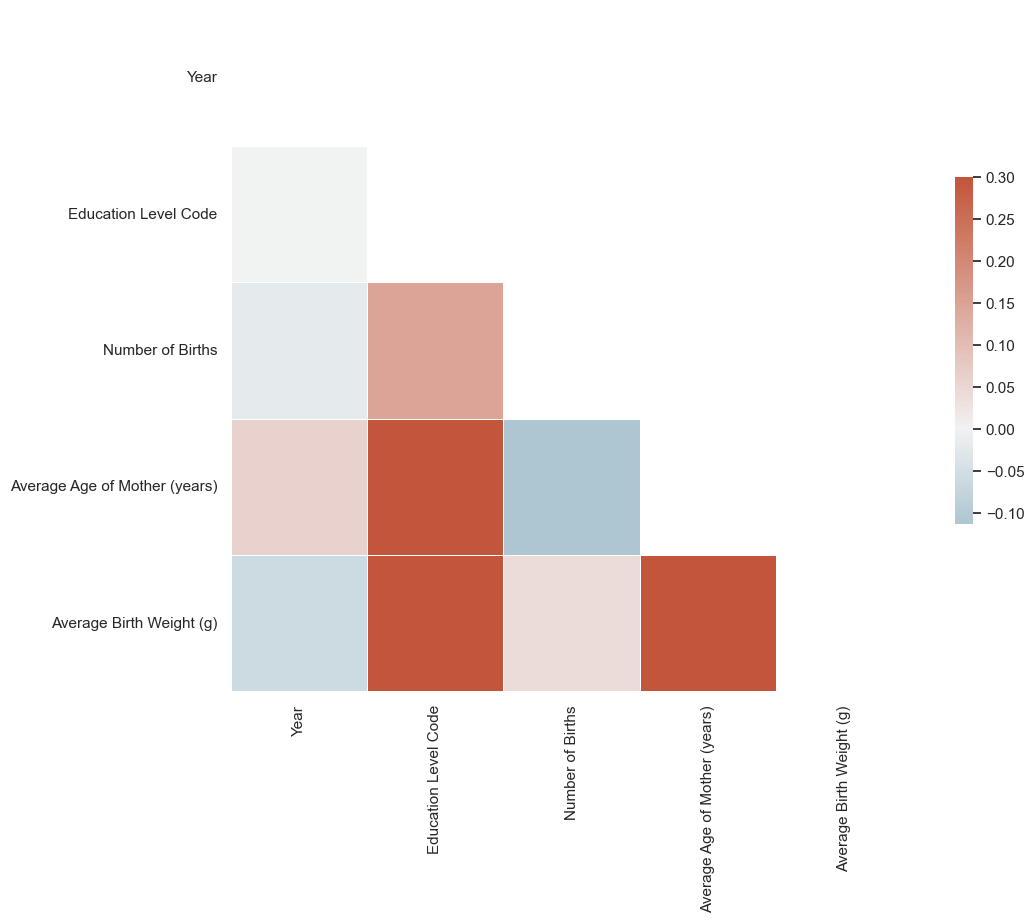

In [15]:
corr = z

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
import seaborn.objects as so

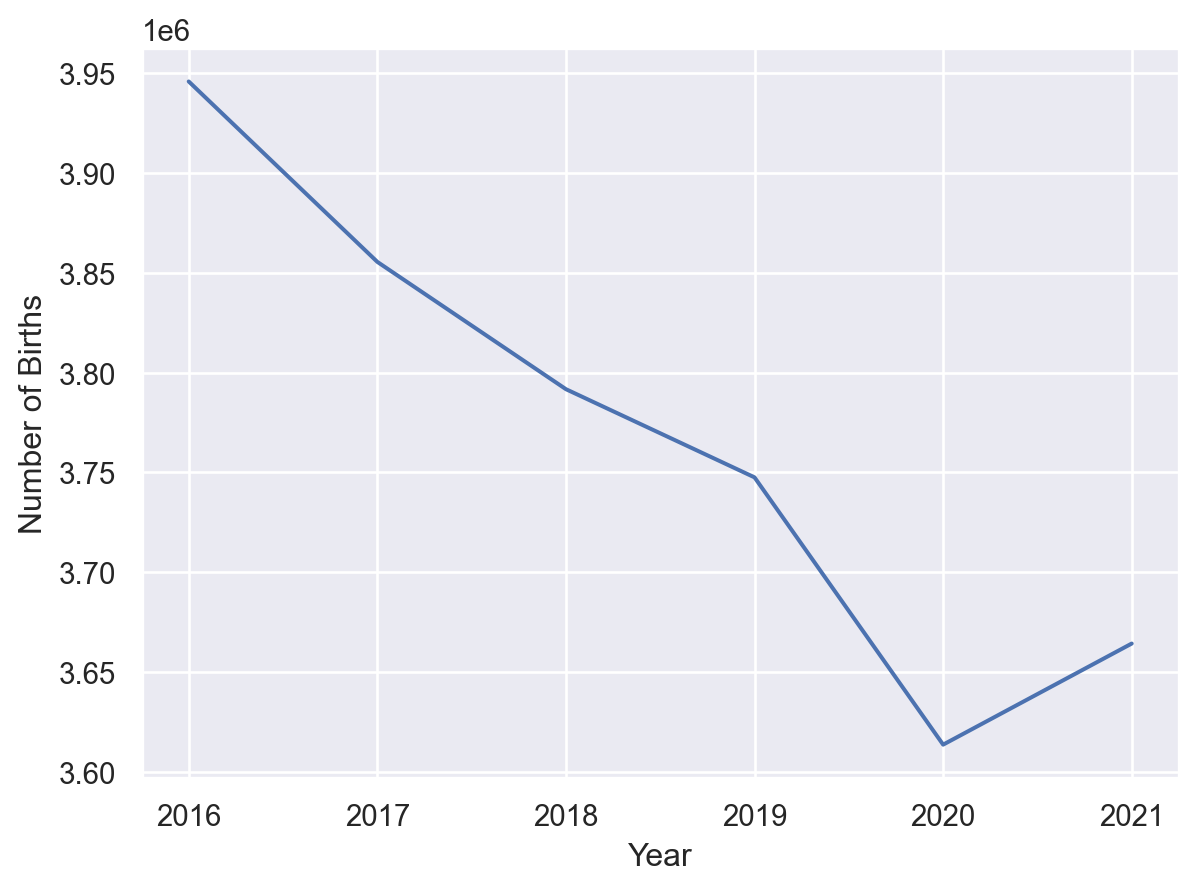

In [17]:
(
    so.Plot(z2, x= z2.index, y='Number of Births')#, color="Country")
    .add(so.Line())
)

In [18]:
z4_cleaned= z4_cleaned.sort_values('Education Level Code', ascending=True)

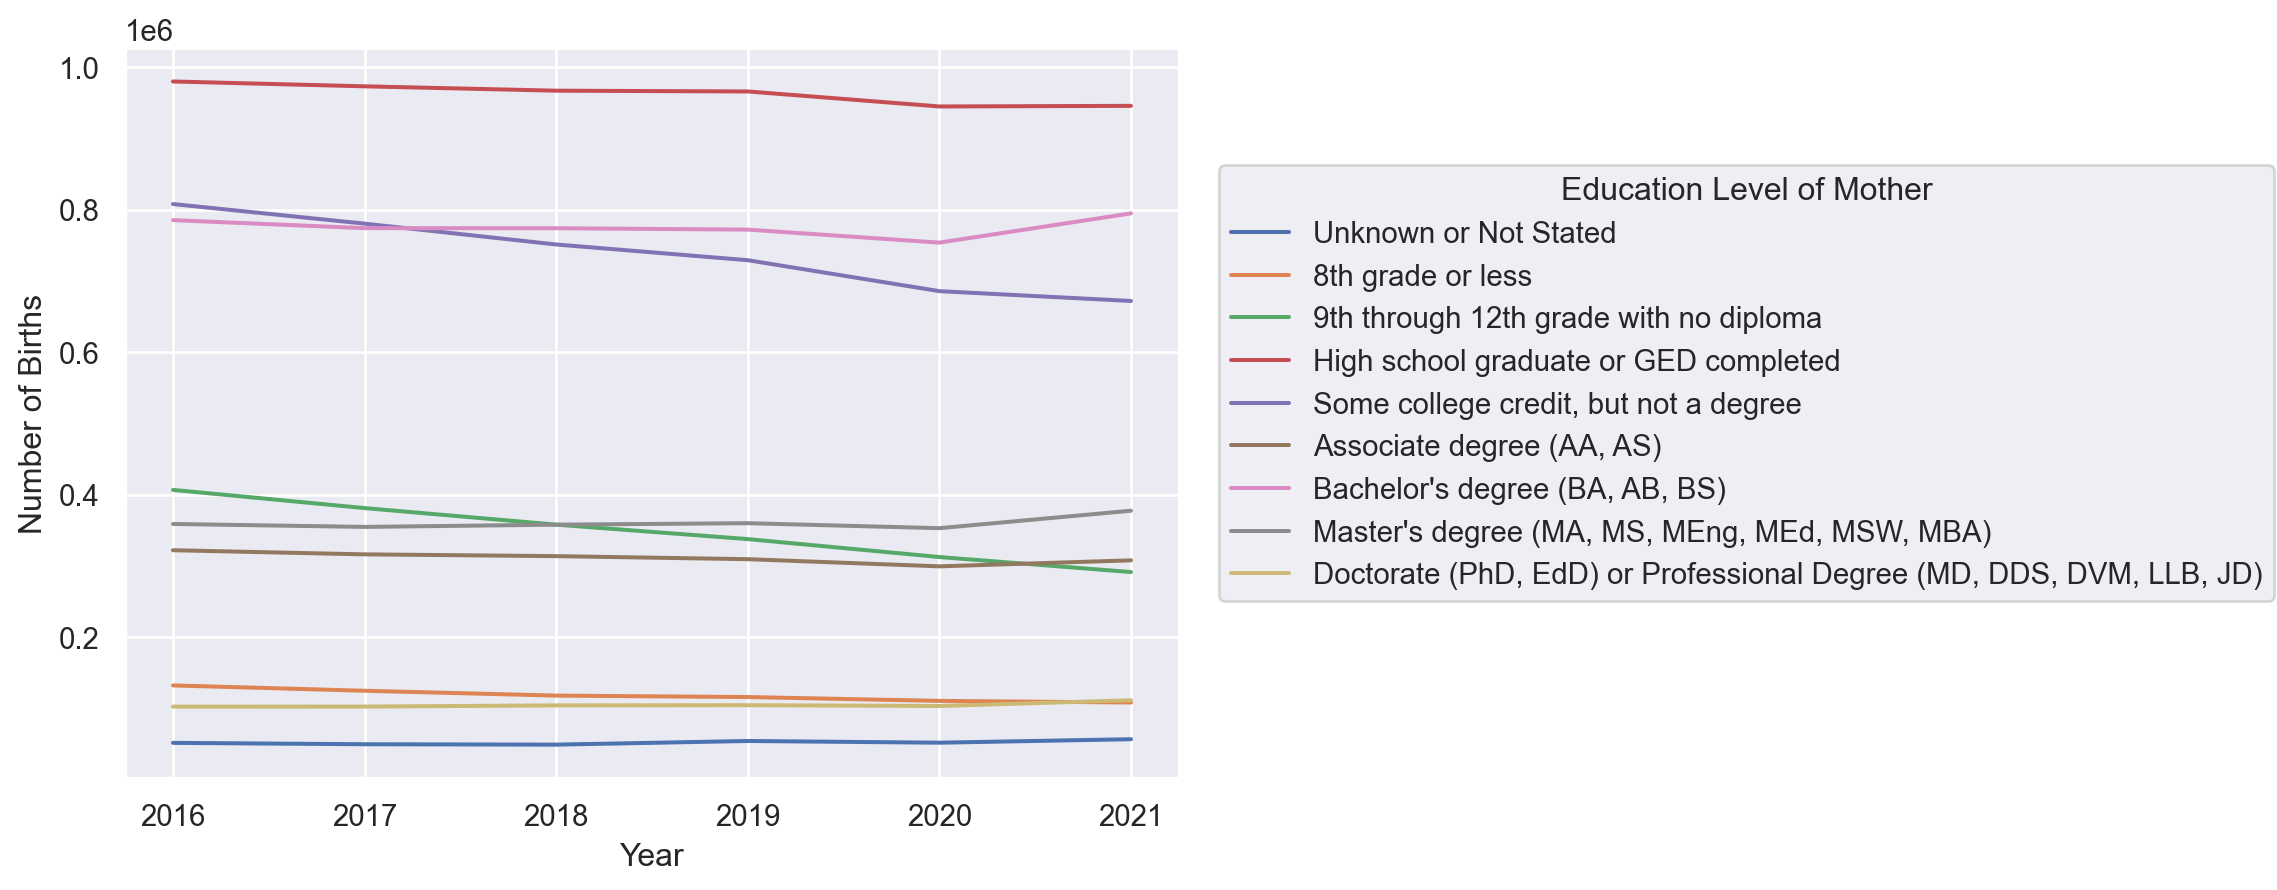

In [19]:
(
    so.Plot(z4_cleaned,x= 'Year', y='Number of Births', color="Education Level of Mother")
    .add(so.Line())
)

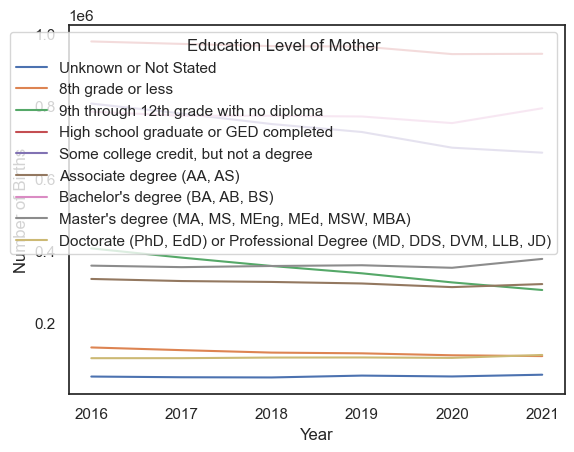

In [20]:
import matplotx

f, ax = plt.subplots()
sns.lineplot(z4_cleaned,x= 'Year', y='Number of Births', hue="Education Level of Mother")
#pos = ax.get_position()
#ax.legend(loc='upper right', bbox_to_anchor=(2.13, .75))
matplotx.line_labels() 


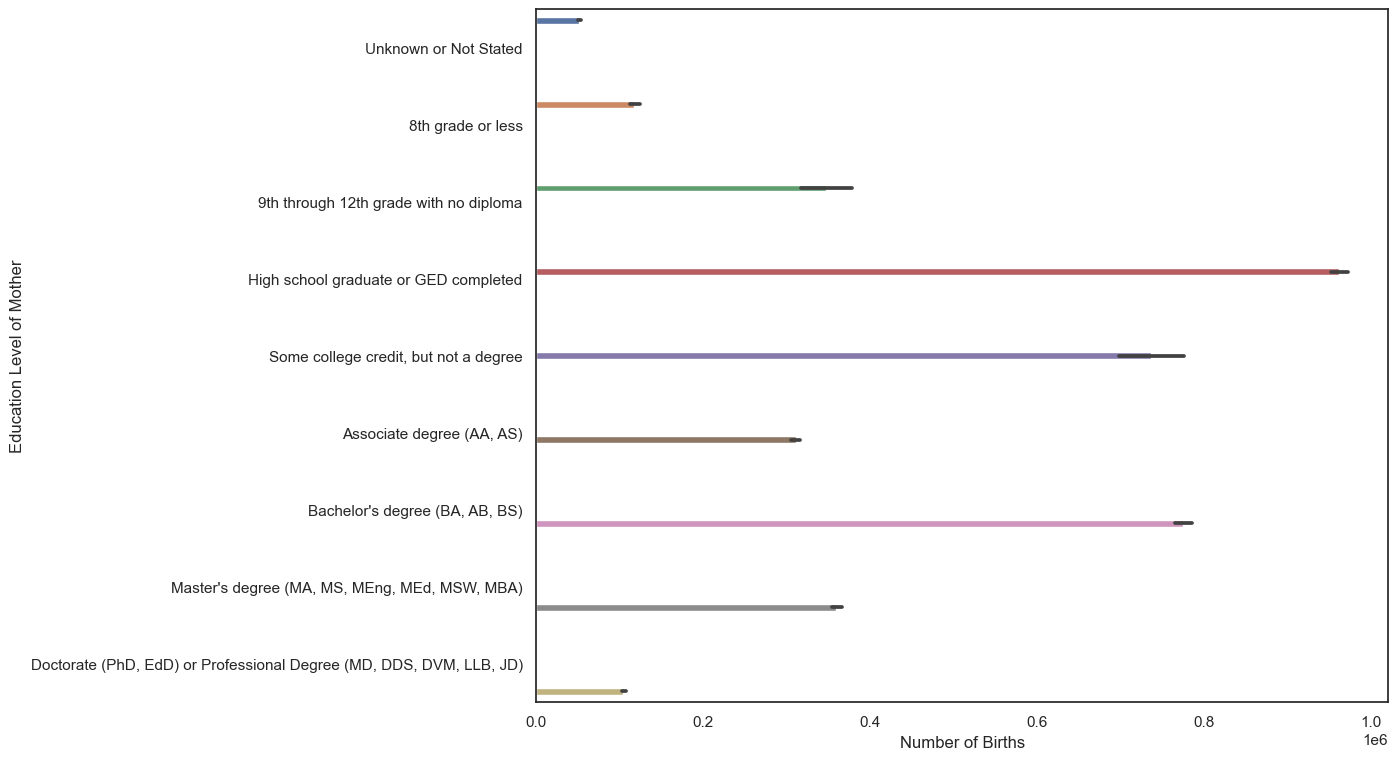

In [21]:
f, ax = plt.subplots(figsize=(11, 9))

sns.barplot(z4_cleaned,x= 'Number of Births', y= "Education Level of Mother", hue="Education Level of Mother")
ax.legend().set_visible(False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


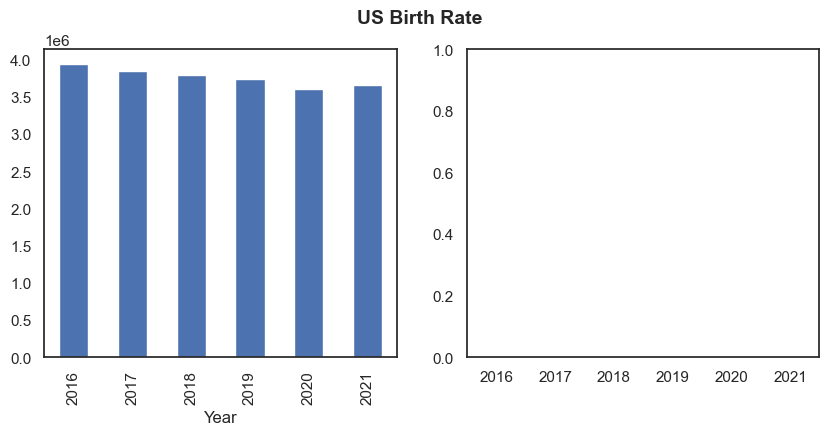

In [22]:
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,4))

b_avg = z3.groupby('Year')['Number of Births'].sum()
# Build the first plot
b_avg.plot(kind='bar', ax=ax0)
#ax0.set(title='Revenue', xlabel='Total revenue', ylabel='Customers')

# Add average line to the first plot
#revenue_average = top_10['Sales'].mean()
#ax0.axvline(x=revenue_average, color='r', label='Average', linestyle='--', linewidth=1)

# Build the second plot
#z3.plot(kind='bar', y='Average Age of Mother (years)', ax=ax1)
#ax1.set(title='Units', xlabel='Total units', ylabel='')

# Add average line to the second plot
#purchases_average = top_10['Purchases'].mean()
#ax1.axvline(x=purchases_average, color='r', label='Average', linestyle='--', linewidth=1)

# Title the figure
fig.suptitle('US Birth Rate', fontsize=14, fontweight='bold')

# Hide the plot legends
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

In [23]:
b_avg = z3.groupby('Year')['Number of Births'].sum()
b_avg

Year
2016    3945853
2017    3855479
2018    3791707
2019    3747531
2020    3613633
2021    3664277
Name: Number of Births, dtype: int64

In [24]:
z4 = birth_rates_df.drop(columns=["Gender", 'State', 'Average Birth Weight (g)', 'State Abbreviation']).reset_index()
z4_cleaned = z4.groupby(['Year', 'Education Level of Mother', 'Education Level Code']).agg({"Number of Births":'sum', 'Average Age of Mother (years)':'mean'}).reset_index()
z4_cleaned= z4_cleaned.sort_values(by = ['Year', 'Education Level Code'], ascending = [True, True])
z4_cleaned.head()

,Year,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years)
8,2016,Unknown or Not Stated,-9,51477,29.157576
0,2016,8th grade or less,1,132090,29.193137
1,2016,9th through 12th grade with no diploma,2,406561,24.710784
5,2016,High school graduate or GED completed,3,979820,26.206863
7,2016,"Some college credit, but not a degree",4,807772,27.652941


<Axes: xlabel='Number of Births', ylabel='Education Level of Mother'>

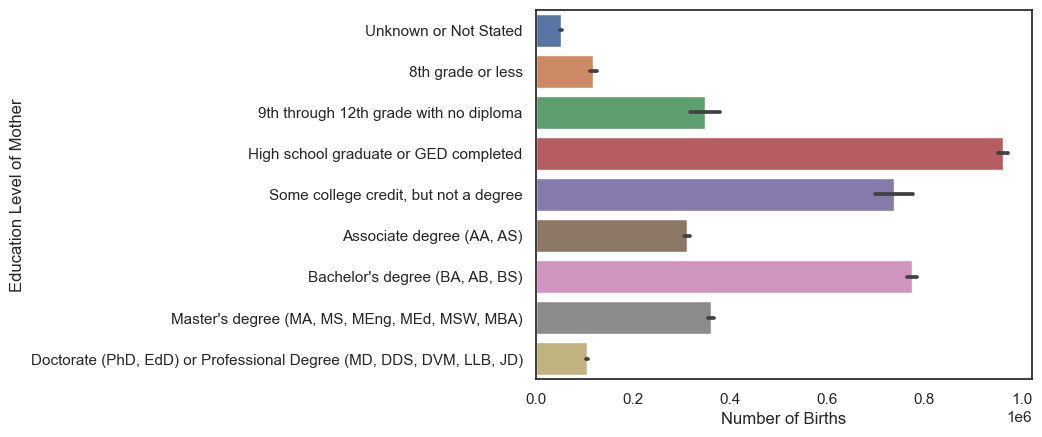

In [25]:
sns.barplot(data=z4_cleaned, y="Education Level of Mother", x="Number of Births")

<Axes: xlabel='Average Age of Mother (years)', ylabel='Education Level of Mother'>

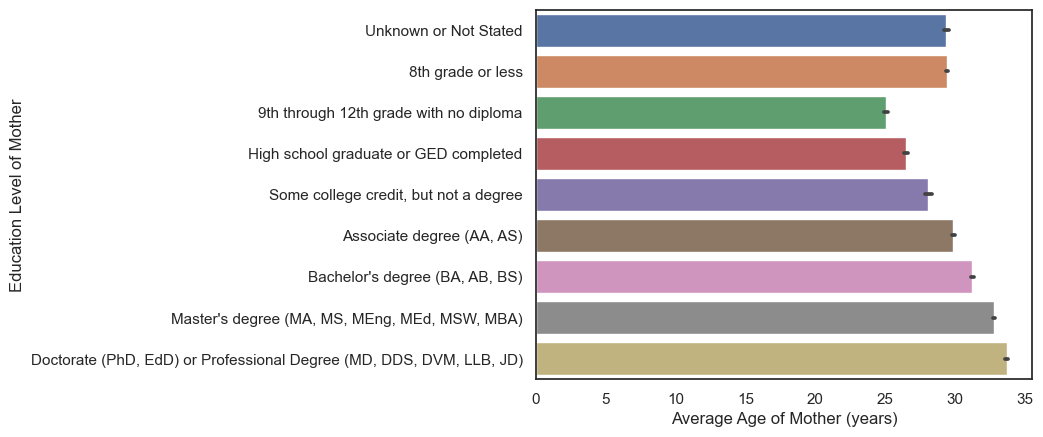

In [30]:
sns.barplot(data=z4_cleaned, y="Education Level of Mother", x="Average Age of Mother (years)")

In [26]:
weight = birth_rates_df.drop(columns=["Gender", 'State', 'State Abbreviation', 'Education Level of Mother', 'Education Level Code']).reset_index()
w_cleaned = weight.groupby(['Year', 'Average Age of Mother (years)']).agg({"Number of Births":'sum', 'Average Birth Weight (g)': 'mean'}).reset_index()
w_cleaned= w_cleaned.sort_values('Average Birth Weight (g)', ascending=True)
z= []
for grams in w_cleaned['Average Birth Weight (g)']:
    z.append(grams / 453.6)
z
w_cleaned['Average Birth Weight (lbs)'] = z
w_cleaned['Average Age of Mother (years)'] = w_cleaned['Average Age of Mother (years)'].round()
w_cleaned['Average Birth Weight (lbs)'] = w_cleaned['Average Birth Weight (lbs)'].round(2)
w_cleaned = w_cleaned.groupby(['Year', 
                               'Average Age of Mother (years)']
                               ).agg({"Number of Births":'sum',
                                'Average Birth Weight (g)': 'mean',
                                'Average Birth Weight (lbs)': 'mean'}).reset_index()
w_cleaned['Average Age of Mother (years)'] = w_cleaned['Average Age of Mother (years)'].astype(int)
w_cleaned = w_cleaned.sort_values(by=['Year', 'Average Age of Mother (years)'], ascending=False).drop(columns=['Average Birth Weight (g)', 'Average Birth Weight (lbs)'])
w_cleaned_sorted = w_cleaned.sort_values(['Year', 'Number of Births'], ascending=False).head(14)
w_cleaned_sorted

,Year,Average Age of Mother (years),Number of Births
69,2021,28,610739
67,2021,26,459663
72,2021,31,428802
70,2021,29,391533
68,2021,27,358577
74,2021,33,358463
73,2021,32,355569
71,2021,30,331604
75,2021,34,180176
66,2021,25,110593


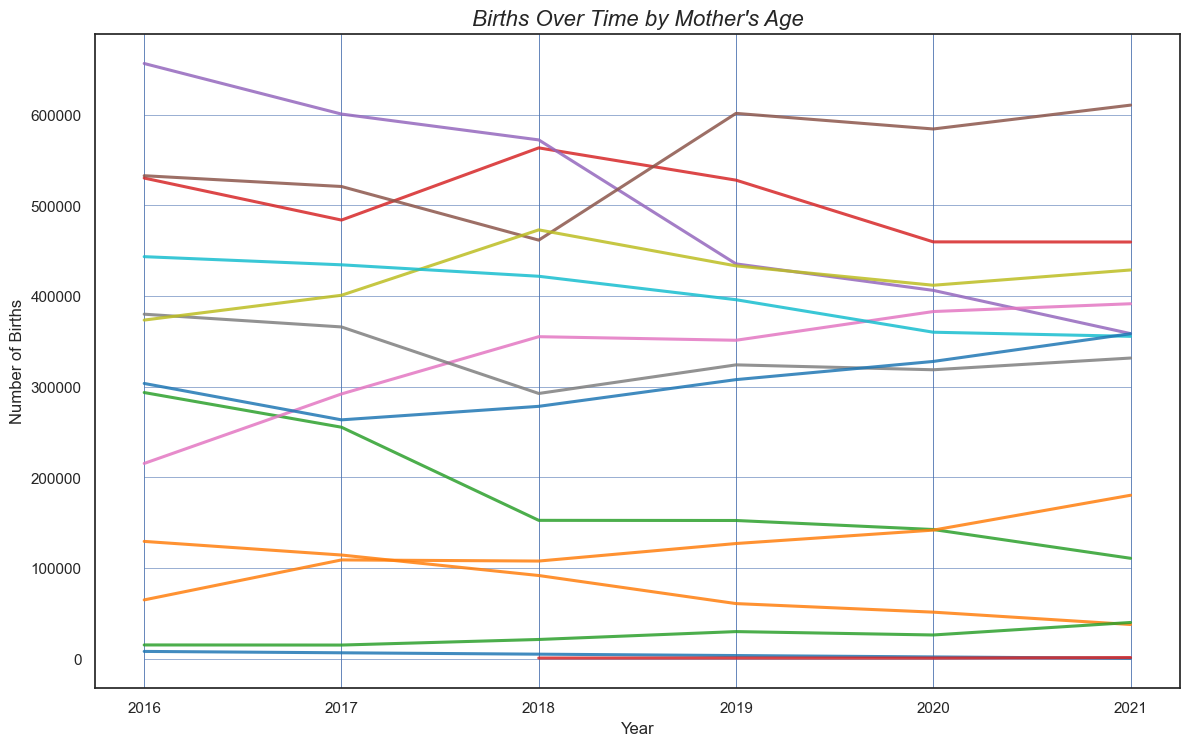

In [31]:
VLINES = np.arange(2016, 2022, 1)
# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (14, 8.5))
ax.set_title("Births Over Time by Mother's Age", style= 'italic', fontsize=16)
# Background color
#fig.patch.set_facecolor(GREY98)
#ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(0, 700000, 100000), xmin=2016, xmax=2021, lw=0.4)

# Darker horizontal line at y=0
#ax.hlines(xmin=2016, xmax=2021, lw=0.8)

# Vertical like at x = 2008
#ax.axvline(2008, color=GREY40, ls="dotted")

# Annotations indicating the meaning of the vertical line
#ax.text(2008.15, -3.35, "2008", fontname="Montserrat", 
        #fontsize=14, fontweight=500, color=GREY40, ha="left")

# Add lines ------------------------------------------------------
# Create one data frame for the highlighted countries, and other
# for non-highlighted countries.
#df_highlight = df_mac_indexed_2008[df_mac_indexed_2008["group"] != "other"]
#df_others = df_mac_indexed_2008[df_mac_indexed_2008["group"] == "other"]

#for group in w_cleaned["Year"].unique():
   #data = df_others[df_others["iso_a3"] == group]
sns.lineplot(data=w_cleaned, y="Number of Births", x="Year", hue='Average Age of Mother (years)',palette='tab10', lw=2.2, alpha=.85)
'''
for idx, group in enumerate(df_highlight["iso_a3"].unique()):
    data = df_highlight[df_highlight["iso_a3"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("year", "price_rel", color=color, lw=1.8, data=data)'''
ax.legend().set_visible(False)

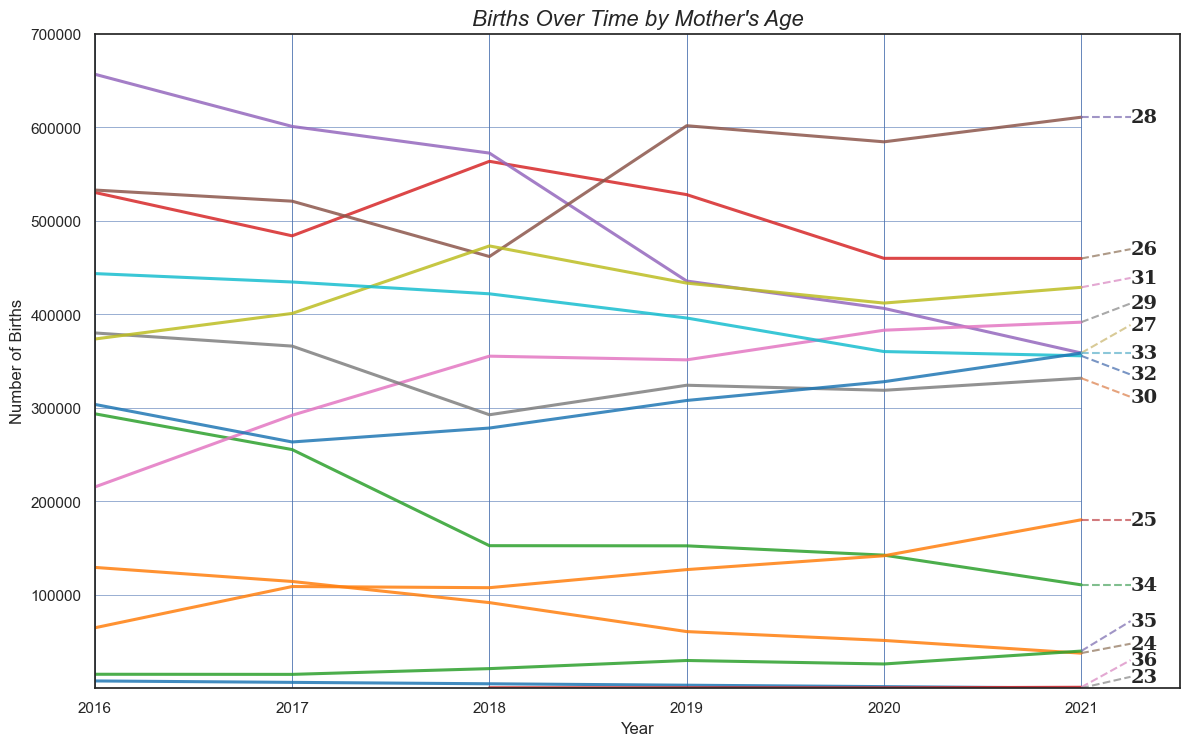

In [32]:
# First, adjust axes limits so annotations fit in the plot
ax.set_xlim(2016, 2021.5)
ax.set_ylim(1, 700000)

# Positions
LABEL_Y = [
    610709,   # 28
    469623,   # 26
    438822,  # 31
    411533,  # 29
    388537,  # 27
    358493,  # 33
    335529,   # 32 
    311624,     # 30
    110523,    # 25
    180196,    # 34
    71794,    # 35
    47590,  # 24
    30083,     # 36
    12221  # 23      
]
LABEL_Ystart = [
    610709,   # 28
    459623,   # 26
    428822,  # 31
    391533,  # 29
    358537,  # 27
    358493,  # 33
    355529,   # 32 
    331624,     # 30
    110523,    # 25
    180196,    # 34
    39794,    # 35
    37590,  # 24
    1083,     # 36
    221  # 23       
]

x_start = 2021
x_end = 2021.25
PAD = 0.1

# Add labels for highlighted countries honly
for idx, group in enumerate(w_cleaned_sorted['Average Age of Mother (years)'].unique()):
    data = w_cleaned_sorted[(w_cleaned_sorted['Average Age of Mother (years)'] == group) & (w_cleaned_sorted["Year"] == 2021)]
    color = sns.color_palette('tab10')
    
    # Country name
    text = data['Average Age of Mother (years)'].values[0]
    
    # Vertical start of line
    y_start = LABEL_Ystart[idx]#data["Number of Births"].values[-1]
    # Vertical end of line
    y_end = LABEL_Y[idx]
    
    # Add line based on three points
    ax.plot(
        [x_start, x_end, x_end],#(x_start + x_end - PAD) / 2 , x_end - PAD], 
        [y_start, y_end, y_end], 
        #color=color, 
        alpha=0.75, 
        ls="dashed"
    )
    
    # Add country text
    ax.text(
        x_end, 
        y_end, 
        text, 
        #color=color, 
        fontsize=14, 
        weight="bold", 
        fontfamily="Serif", 
        va="center"
    )
fig

In [29]:
for idx, group in enumerate(w_cleaned_sorted['Average Age of Mother (years)'].unique()):
    data = w_cleaned_sorted[(w_cleaned_sorted['Average Age of Mother (years)'] == group) & (w_cleaned_sorted["Year"] == 2021)]

    text = data['Average Age of Mother (years)'].values[0]

    print(text)

28
26
31
29
27
33
32
30
34
25
35
24
36
23
